In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from  sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeCV
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn import svm
from xgboost import XGBClassifier
from BorutaShap import BorutaShap


In [178]:
class ModelProcess:
    T1_id = {
            'Mental' : [
                'T1_PONT_TOTAL',
                'T1_PONT_A',
                'T1_PONT_D'
            ], 
            'Avaliacao':[
                'PESO_T1','IMC_T1','IMC1_CLASS','CC_T1',
                'CC_T1_CLAS','CQ_T1','RCQ_T1','RCQ_T1_CLAS',
                'RCE_T1','RCE_T1_CLAS','CP_T1','CP_T1_CLAS',
                'CB_T1','CB_T1_ADEQUA','CB_T1_CLAS'
            ], 
            'Dietetico':[
                'VCT_T1','CHO_G_T1','CHO_%_T1','PTN_G_T1',
                'PTN_%_T1','LIP_G_T1','LIP_%_T1','COLESTEROL_T1',
                'ADEQ_COLES_T1','G_SAT_T1','ADEQ_G_SAT_T1'
            ],
            'Questionario':[
                'Q_1_T1','Q_2_T1','Q_3_T1','Q_4_T1','Q_5_T1',
                'Q_6_T1','Q_7_T1','Q_8_T1','Q_9_T1','Q_10_T1',
                'Q_11_T1','Q_12_T1','Q_13_T1','Q_14_T1','Q_15_T1',
                'Q_16_T1','Q_17_T1','Q_18_T1','Q_19_T1','Q_20_T1',
                'Q_21_T1','Q_22_T1','Q_23_T1','TOTAl_T1'
            ]
        }
    T2_id = {
        'Mental' : [
            'T2_PONT_TOTAL',
            'T2_PONT_A','T2_PONT_D'
        ],
        'Avaliacao':[
            'PESO_T2','IMC_T2','IMC2_CLASS','CC_T2',
            'CC_T2_CLAS','CQ_T2','RCQ_T2','RCQ_T2_CLAS',
            'RCE_T2','RCE_T2_CLAS','CP_T2','CP_T2_CLAS',
            'CB_T2','CB_T2_ADEQUA','CB_T2_CLAS'

        ],
        'Dietetico':[
            'VCT_T2','CHO_G_T2','CHO_%_T2','PTN_G_T2',
            'PTN_%_T2','LIP_G_T2','LIP_%_T2','COLESTEROL_T2',
            'ADEQ_COLES_T2','G_SAT_T2','ADEQ_G_SAT_T2'
        ],
        'Questionario':[
            'Q_1_T2','Q_2_T2','Q_3_T2','Q_4_T2','Q_5_T2',
            'Q_6_T2','Q_7_T2','Q_8_T2','Q_9_T2','Q_10_T2',
            'Q_11_T2','Q_12_T2','Q_13_T2','Q_14_T2','Q_15_T2',
            'Q_16_T2','Q_17_T2','Q_18_T2','Q_19_T2','Q_20_T2',
            'Q_21_T2','Q_22_T2','Q_23_T2','TOTAl_T2'
        ]
    }
    Target ={
            "Classificatorias" :[
                'IMC2_CLASS',
                'CC_T2_CLAS',
                'RCQ_T2_CLAS',
                'RCE_T2_CLAS',
                'CP_T2_CLAS',
                'CB_T2_CLAS'
            ],
            'Numericas':[
                'IMC_T2',
                'CC_T2',
                'CQ_T2',
                'RCQ_T2',
                'RCE_T2',
                'CP_T2',
                'CB_T2',
                'CB_T2_ADEQUA'
            ]
        }
    def __init__(self,path : str = "data/staged/full_treated_data.json") -> None:
        self.df =  pd.read_json(path)
    
    def drop_rows_except_specific(self,df, specific_column):
        rows_to_drop = []
        for index, row in df.iterrows():
            # Check if all values in the row are zero except for the specific one
            if row.drop(specific_column).eq(0).all() and row[specific_column] != 0:
                rows_to_drop.append(index)
        # Drop the selected rows
        return df.drop(rows_to_drop, inplace=False)

    def drop_empty(self,df: pd.DataFrame)->pd.DataFrame:
        # df = self.drop_rows_except_specific(df,'ID_VOLUNT')
        return df[(df != 999).all(axis=1)].reset_index(drop=True)
    
    def data_type_class(self,selected : list = []):
        """ Get data for identifying if pacient is from control or SOP Group"""
        cols = [
            'ID_VOLUNT', 
            ]
        if len(selected) < 1:
            # cols.extend(self.T1_id['Mental'])
            cols.extend(self.T1_id['Questionario'])
        else:
            cols.extend(selected)
        df = self.df[cols]
        df = self.drop_empty(df)
        return {
            "Y" : df['ID_VOLUNT'].map({1 : 1, 2:0}),
            "X" : df.drop(columns='ID_VOLUNT')
        }
    
    def instantiate_models(self):
        self.models ={
            'lr_clf' : LogisticRegression(random_state=0),
            'rf_clf' : RandomForestClassifier(random_state=0),
            'gb_clf' : GaussianNB(),
            'knn_clf' : neighbors.KNeighborsClassifier(),
            'svm_clf' : svm.SVC(kernel='linear'),
            'svm_rbf_clf' : svm.SVC(kernel='rbf'),
            'svm_sig_clf' : svm.SVC(kernel='sigmoid'),
            'xgb_clf' : XGBClassifier(),
            'gbc_clf' : GradientBoostingClassifier(random_state=0),
            'dt_clf' : DecisionTreeClassifier(random_state=0)
        }
    def select_best_model_ridge(self)
    def select_best_model_bs(self):
        best_model = { 
            "Name" : None,
            "Score" : 0.0,
            "Model" : None
            }
        cols = self.select_features()
        data = self.data_type_class(cols)
        self.data = data
        X_train, X_test, y_train, y_test = train_test_split(data['X'][cols], data["Y"], random_state=0)
        for name, model in self.models.items():
            clf = model.fit(X_train,y_train)
            score = clf.score(X_test, y_test)
            if score > best_model["Score"]:
                best_model = { 
                    "Name" : name,
                    "Score" : score,
                    "Model" : clf,
                    "variables" : data['X'].columns.tolist()
                    }
        return best_model
    
    def get_feature_importance(self, rf_clf  : RandomForestClassifier) -> dict:
        features = rf_clf.feature_names_in_
        importances =  rf_clf.feature_importances_
        feature_importances = {fea: imp for imp, fea in zip(importances, features)}
        return  {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    
    def print_importance(self, importance:dict)-> None:
        for k, v in importance.items():
            print(f"{k} -> {v:.4f}")

    def select_features_b_s(self):
        data = self.data_type_class()
        X = data['X']
        y = data["Y"]
        Feature_Selector = BorutaShap(model=self.models['xgb_clf'],
                              importance_measure='shap',
                              classification=True)
        Feature_Selector.fit(X=X, y=y, n_trials=40, sample=False,
                    train_or_test = 'test', normalize=True,
            verbose=False)
        Feature_Selector.plot()
        return Feature_Selector.Subset().columns.tolist()

    def rank_features(self, data : dict):
        X = data['X']
        y = data['Y']
        ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

        importance = np.abs(ridge.coef_)
        feature_names = np.array(X.columns)

        # Sort the features by their importance
        indices = np.argsort(importance)[::-1]
        top_feature_indices = indices[:]
        top_features = feature_names[top_feature_indices]
        top_importance = importance[top_feature_indices]
        plt.clf()
        plt.barh(top_features, top_importance)
        plt.xlabel('Importance')
        plt.title("Feature Importances via Coefficients")
        plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
        plt.tight_layout()  # Adjust layout to prevent clipping of labels
        plt.savefig(f'images/Data_Behavior/Feature_Importance.png')
        return top_features.tolist()
    
    def confusion_matrix(self,best_model):
        model = best_model['Model']
        features = best_model['variables']
        name = best_model['Name']
        y_pred = model.predict(self.data_type_class()['X'][features])
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            confusion_matrix(self.data_type_class()['Y'], y_pred), 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=np.unique(self.data_type_class()['Y']), 
            yticklabels=np.unique(self.data_type_class()['Y'])
            )
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {name}')
        plt.savefig(f'images/Data_Behavior/Model_Behavior/Status_Classifier/Confusion_Matrix_{name}')


In [179]:
Process = ModelProcess()
Process.instantiate_models()
best_model = Process.select_best_model()

{'Name': 'lr_clf', 'Score': 0.6818181818181818, 'Model': LogisticRegression(random_state=0), 'variables': ['Q_4_T1', 'Q_22_T1', 'Q_10_T1', 'Q_2_T1', 'Q_5_T1', 'TOTAl_T1']}
{'Name': 'rf_clf', 'Score': 0.7727272727272727, 'Model': RandomForestClassifier(random_state=0), 'variables': ['Q_4_T1', 'Q_22_T1', 'Q_10_T1', 'Q_2_T1', 'Q_5_T1', 'TOTAl_T1']}
{'Name': 'gb_clf', 'Score': 0.7272727272727273, 'Model': GaussianNB(), 'variables': ['Q_4_T1', 'Q_22_T1', 'Q_10_T1', 'Q_2_T1', 'Q_5_T1', 'TOTAl_T1']}
{'Name': 'knn_clf', 'Score': 0.45454545454545453, 'Model': KNeighborsClassifier(), 'variables': ['Q_4_T1', 'Q_22_T1', 'Q_10_T1', 'Q_2_T1', 'Q_5_T1', 'TOTAl_T1']}
{'Name': 'svm_clf', 'Score': 0.6818181818181818, 'Model': SVC(kernel='linear'), 'variables': ['Q_4_T1', 'Q_22_T1', 'Q_10_T1', 'Q_2_T1', 'Q_5_T1', 'TOTAl_T1']}
{'Name': 'svm_rbf_clf', 'Score': 0.36363636363636365, 'Model': SVC(), 'variables': ['Q_4_T1', 'Q_22_T1', 'Q_10_T1', 'Q_2_T1', 'Q_5_T1', 'TOTAl_T1']}
{'Name': 'svm_sig_clf', 'Score':

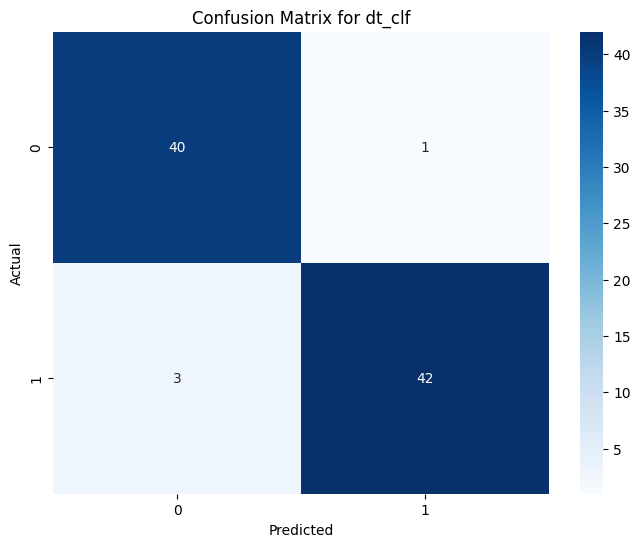

In [180]:
Process.confusion_matrix(best_model)